# Homework 2: Exploratory data analysis and visualization

UIC CS 418, Fall 2025

**Academic Integrity Policy**: According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/community-standards/academic-integrity/

This homework is an individual assignment for all graduate students. Undergraduate students are allowed to work in pairs to discuss and share ideas with each other, but you still need to work and submit homework by yourself. **Identical submissions are not allowed**. The pairs of students who choose to work together still need to abide by the **Academic Integrity Policy** and not share or receive help from others (except each other).

There are three parts in this homework. The zero one is a practice introduction to `matplotlib` (5%). The first part is a guided exploration of a bikeshare dataset (40%). The second one is a self-guided exploration of a dataset on social media and internet attitudes (45%). Third part deals with understanding of loss functions (10%). You can also earn extra credit of 10%.


## Due Date

This assignment is due at 11:59pm Saturday, March 1st. Late submissions will not be considered.


## Submission Instruction

You need to complete all code and answer all questions denoted by **Q#** in this notebook. After executing all commands and completing this notebook, export/convert your *hw2.ipynb* to a **pdf** file and upload it to Gradescope under *Homework 2 (pdf)*. Make sure you check that your **pdf** file includes all parts of your solution **(including the outputs)**. Check `warmup.pdf` for an example of expected submission file. You are also reqired to submit your **.iypnb** file to the *Homework 2 (code)* section with all the output visibile in the output cells.

**Note**:
When you submit the solution to Gradescope, it is necessary that you **mark/tag all pages of each solution to its question based on the homework outline**, so that it can be easily found. You may lose marks if you don't mark your solutions.

In [ ]:
%pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Practice: `matplotlib` (5%)

[`matplotlib`][mpl] is the most widely used plotting library available for Python. It comes with a good amount of out-of-the-box functionality and is highly customizable. Most other plotting libraries in Python provide simpler ways to generate complicated `matplotlib` plots, including `seaborn`, so it's worth learning a bit about `matplotlib` now.

Notice how all of our notebooks have lines that look like:

	%matplotlib inline
	import matplotlib.pyplot as plt

The `%matplotlib inline` magic command tells `matplotlib` to render the plots
directly onto the notebook (by default it will open a new window with the plot).

Then, the `import` line lets us call `matplotlib` functions using `plt.<func>`

Here's a graph of `sin(x)` from 0 to 2 * pi.

[mpl]: http://matplotlib.org/

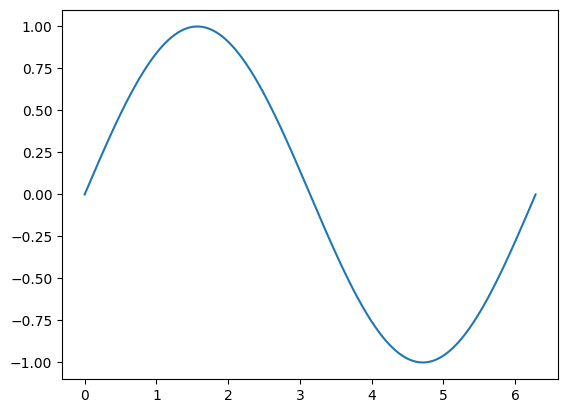

In [ ]:
# Set up (x, y) pairs from 0 to 2*pi
xs = np.linspace(0, 2 * np.pi, 300)
ys = np.sin(xs)

# plt.plot takes in x-values and y-values and plots them as a line
plt.plot(xs, ys)

`matplotlib` also conveniently has the ability to plot multiple things on the same plot. Just call `plt.plot` multiple times in the same cell:

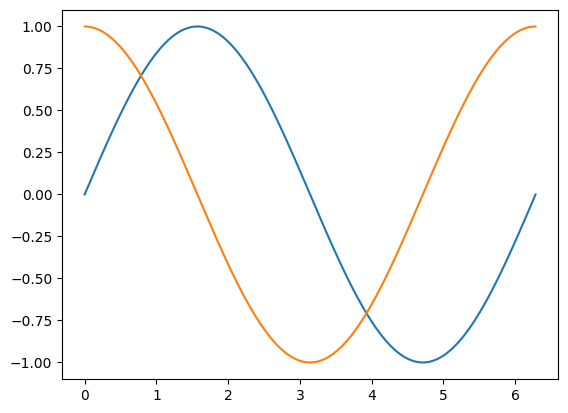

In [ ]:
plt.plot(xs, ys)
plt.plot(xs, np.cos(xs))

That plot looks pretty nice but isn't presentation-ready. Luckily, `matplotlib` has a wide array of plot customizations.


## Q0 (5%):

Skim through the first part of the tutorial at https://github.com/rougier/matplotlib-tutorial to create the plot below. There is a lot of extra information there which we suggest
you read on your own time. For now, just look for what you need to make the plot.

Specifically, you'll have to change the x and y limits, add a title, and add a legend.

![](q1.png)

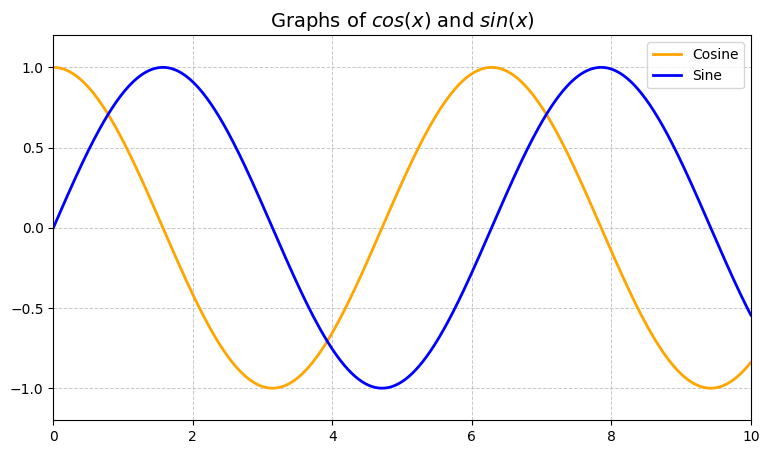

In [ ]:
# Here's the starting code from last time. Edit / Add code to create the plot above.
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 500)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(9, 5))

plt.plot(x, y2, label='Cosine', color='orange', linewidth=2)
plt.plot(x, y1, label='Sine', color='blue', linewidth=2)

plt.title(r'Graphs of $\it{cos(x)}$ and $\it{sin(x)}$', fontsize=14)

plt.xlim(0, 10)
plt.ylim(-1.2, 1.2)
plt.yticks([-1, -0.5, 0, 0.5, 1])

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(loc='upper right')

plt.show()

# Part 1: Guided EDA of bikeshare trips (40%)

You will be performing some basic EDA (exploratory data analysis) on
bikeshare data in Washington D.C.

The variables in this data frame are defined as:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not
- weekday : day of the week (Sunday to Saturday)
- workingday : if day is neither weekend nor holiday
- weathersit :
    - 1: Clear or partly cloudy
    - 2: Mist + clouds
    - 3: Light Snow or Rain
    - 4: Heavy Rain or Snow
- temp : Normalized temperature in Celsius (divided by 41)
- atemp: Normalized feeling temperature in Celsius (divided by 50)
- hum: Normalized percent humidity (divided by 100)
- windspeed: Normalized wind speed (divided by 67)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including casual and registered

In [ ]:
bike_trips = pd.read_csv('bikeshare.csv')

# Here we'll do some pandas datetime parsing so that the dteday column
# contains datetime objects.
bike_trips['dteday'] += ':' + bike_trips['hr'].astype(str)
bike_trips['dteday'] = pd.to_datetime(bike_trips['dteday'], format="%Y-%m-%d:%H")
bike_trips = bike_trips.drop(['yr', 'mnth', 'hr'], axis=1)

bike_trips.head()

instant              dteday  season  holiday  weekday  workingday  \
0        1 2011-01-01 00:00:00       1        0        6           0   
1        2 2011-01-01 01:00:00       1        0        6           0   
2        3 2011-01-01 02:00:00       1        0        6           0   
3        4 2011-01-01 03:00:00       1        0        6           0   
4        5 2011-01-01 04:00:00       1        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

## Q1.1 (10%):
Explore the `bike_trips` dataframe to answer the following questions.


What time range is represented here?
What was the maximum registration (use the "registered" column) on a SINGLE DAY

Write code in the cell below to perform your exploration.

In [ ]:
# your code here
bike_trips['date'] = pd.to_datetime(bike_trips['dteday'])

start_date = bike_trips['date'].min()
end_date = bike_trips['date'].max()

registrations = bike_trips.groupby(bike_trips['date'].dt.date)['registered'].sum()

max_registrations = registrations.max()

print(f"Data covers the period between {start_date} and {end_date}")
print(f"Maximum registration on a single day was {max_registrations}")

Data covers the period between 2011-01-01 00:00:00 and 2012-12-31 23:00:00
Maximum registration on a single day was 6946


## Using `pandas` to plot

`pandas` provides useful methods on dataframes. For simple plots, we prefer to
just use those methods instead of the `matplotlib` methods since we're often
working with dataframes anyway. The syntax is:

    dataframe.plot.<plotfunc>

Where the `<plotfunc>` is one of the functions listed under _Plotting_ here: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

<Axes: xlabel='dteday'>

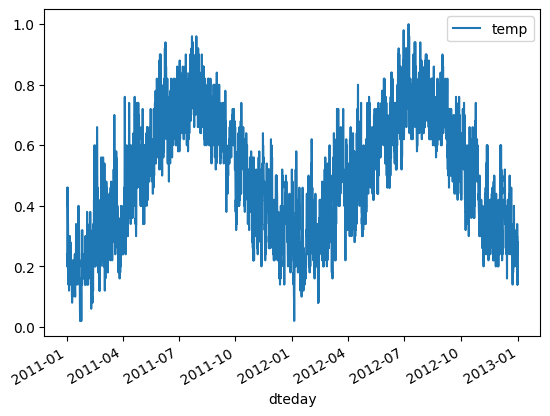

In [ ]:
# This plot shows the temperature at each data point
bike_trips.plot.line(x='dteday', y='temp')

## `seaborn`

Now, we'll learn how to use the [`seaborn`][sns] Python library. `seaborn`
is built on top of `matplotlib` and provides many helpful functions
for statistical plotting that `matplotlib` and `pandas` don't have.

Generally speaking, we'll use `seaborn` for more complex statistical plots,
`pandas` for simple plots (eg. line / scatter plots), and
`matplotlib` for plot customization.

Nearly all `seaborn` functions are designed to operate on `pandas`
dataframes. Most of these functions assume that the dataframe is in
a specific format called *long-form*, where each column of the dataframe
is a particular feature and each row of the dataframe a single datapoint.

For example, this dataframe is long-form:

```
   country year avgtemp
 1  Sweden 1994       6
 2 Denmark 1994       6
 3  Norway 1994       3
 4  Sweden 1995       5
 5 Denmark 1995       8
 6  Norway 1995      11
 7  Sweden 1996       7
 8 Denmark 1996       8
 9  Norway 1996       7
```

But this dataframe of the same data is not:

```
   country avgtemp.1994 avgtemp.1995 avgtemp.1996
 1  Sweden            6            5            7
 2 Denmark            6            8            8
 3  Norway            3           11            7
```

Note that the `bike_trips` dataframe is long-form.

For more about long-form data, see https://stanford.edu/~ejdemyr/r-tutorials/wide-and-long.
For now, just remember that we typically prefer long-form data and it makes plotting using
`seaborn` easy as well.

[sns]: http://seaborn.pydata.org/index.html

We can create the same plot as the `dataframe.plot` above using the following `seaborn` function: `sns.lineplot`. Notice that instead of calling the plot function on dataframe object, here we pass it as a parameter to the function:

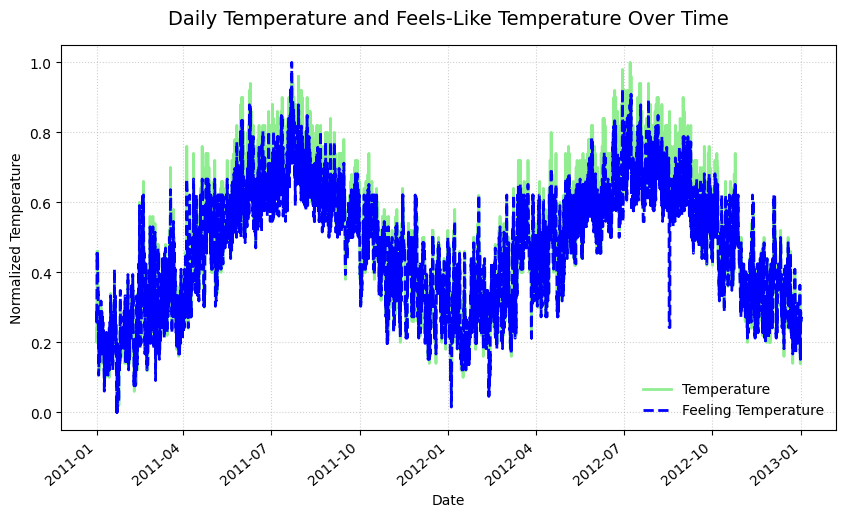

In [ ]:
# You can create a plot similar to the one above using the following seaborn syntax
# Note that the seaborn plot is a bit different and requires some customizations (more on this later)
plt.figure(figsize=(10, 5))

sns.lineplot(data=bike_trips, x='dteday', y='temp', color='lightgreen', linewidth=2, label='Temperature')
sns.lineplot(data=bike_trips, x='dteday', y='atemp', color='blue', linewidth=2, linestyle='--', label='Feeling Temperature')

plt.title('Daily Temperature and Feels-Like Temperature Over Time', fontsize=14, pad=15)

plt.xlabel('Date')
plt.ylabel('Normalized Temperature')

plt.legend(frameon=False)

plt.xticks(rotation=40, ha='right')
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

## Q1.2 (10%):

Use seaborn's `barplot` function to make a bar chart showing
1. the average number of registered riders on each day of the week over the
   entire `bike_trips` dataset.
2. the average number of casual riders on each day of the week over the
   entire `bike_trips` dataset.

Here's a link to the seaborn API: http://seaborn.pydata.org/api.html
.

What trends do you notice? What do you suppose causes these trends?

Notice that `barplot` draws error bars for each category. It uses bootstrapping to make those.

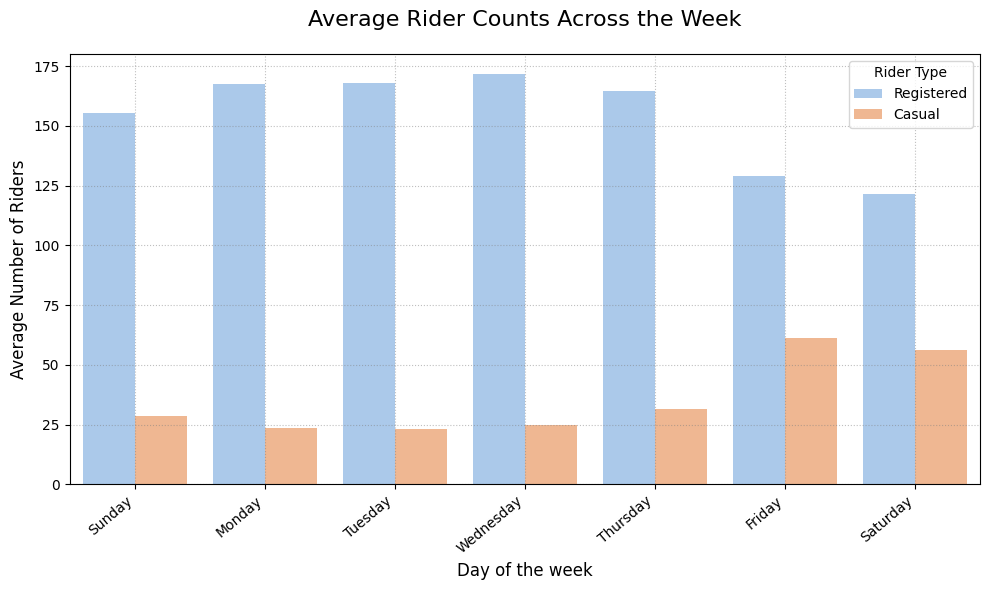

In [ ]:
# your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

avg_registered = bike_trips.groupby(bike_trips['dteday'].dt.weekday)['registered'].mean()
avg_casual = bike_trips.groupby(bike_trips['dteday'].dt.weekday)['casual'].mean()

reg_table = avg_registered.reset_index().rename(columns={'registered': 'avg_riders'})
cas_table = avg_casual.reset_index().rename(columns={'casual': 'avg_riders'})

reg_table['rider_type'] = 'Registered'
cas_table['rider_type'] = 'Casual'

merged_data = pd.concat([reg_table, cas_table], ignore_index=True)
merged_data.columns = ['weekday', 'avg_riders', 'rider_type']

weekdays = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
merged_data['weekday'] = merged_data['weekday'].map(weekdays)

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='avg_riders', hue='rider_type', data=merged_data, palette='pastel')

plt.title('Average Rider Counts Across the Week', fontsize=16, pad=20)
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Average Number of Riders', fontsize=12)
plt.xticks(rotation=40, ha='right')
plt.legend(title='Rider Type', frameon=True)
plt.grid(True, linestyle=':', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()

Registered riders are more active during weekdays (Monday to Friday), as they tend to use bikes more for daily travel. Casual riders are higher on weekends (Saturday and Sunday), which makes sense since people ride more for fun or leisure.


## Q1.3 (10%):

Use `seaborn` to make side-by-side boxplots of the number of casual riders (just
checked out a bike for that day) and registered riders (have a bikeshare membership). The `boxplot` function will plot all the columns of the dataframe you pass in.

Once you make the plot, you'll notice that there are many outliers that make the plot hard to see. To mitigate this, change the y-scale to be logarithmic.

That's a plot customization so you'll use `matplotlib`. The `boxplot` function returns a `matplotlib` Axes object which represents a single plot and has a `set_yscale` function.

The result (after customization) should look like **q5.png**.


/tmp/ipython-input-1114944888.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(['Registered Riders', 'Casual Riders'], fontsize=10)


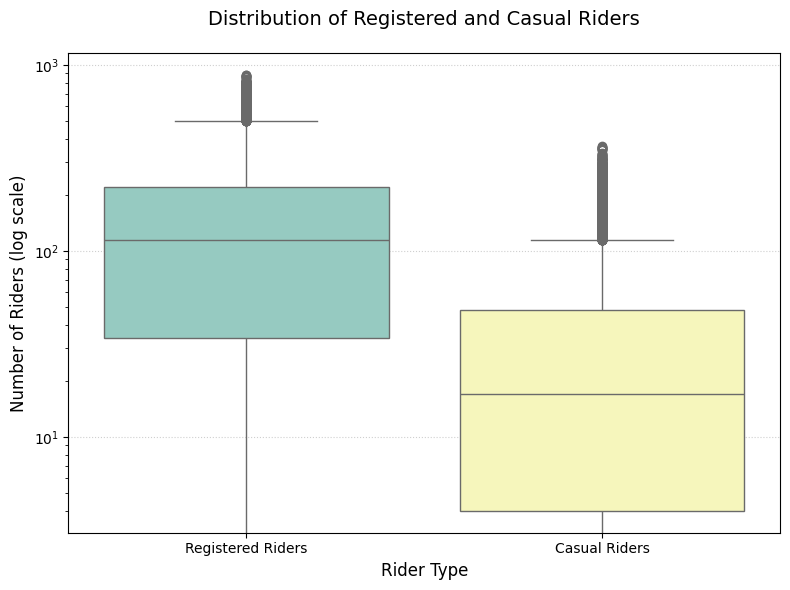

In [ ]:
# your code here
rider_type = bike_trips[['registered', 'casual']]

plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(data=rider_type, palette="Set3")

boxplot.set_yscale('log')
boxplot.set_ylabel('Number of Riders (log scale)', fontsize=12)
boxplot.set_xlabel('Rider Type', fontsize=12)
boxplot.set_title('Distribution of Registered and Casual Riders', fontsize=14, pad=20)

boxplot.set_xticklabels(['Registered Riders', 'Casual Riders'], fontsize=10)

plt.grid(True, linestyle=':', alpha=0.6, axis='y')

plt.tight_layout()
plt.show()


## Q1.4 (10%):

Let's take a closer look at the number of registered vs. casual riders.

Use the `lmplot` function to make a scatterplot. Put the number of casual
riders on the x-axis and the number of registered riders on the y-axis.
Each point should correspond to a single row in your `bike_trips` dataframe. Notice that `seaborn` automatically fits a line of best fit to the plot. Does that line seem to be relevant?

You should note that `lmplot` allows you to pass in `fit_line=False` to
avoid plotting lines of best fit when you feel they are unnecessary
or misleading.

There seem to be two main groups in the scatterplot. Let's
see if we can separate them out. Use `lmplot` to make the scatterplot again. This time, use the `hue` parameter
to color points for weekday trips differently from weekend trips. You should
get something that looks like **q1-5.png**.



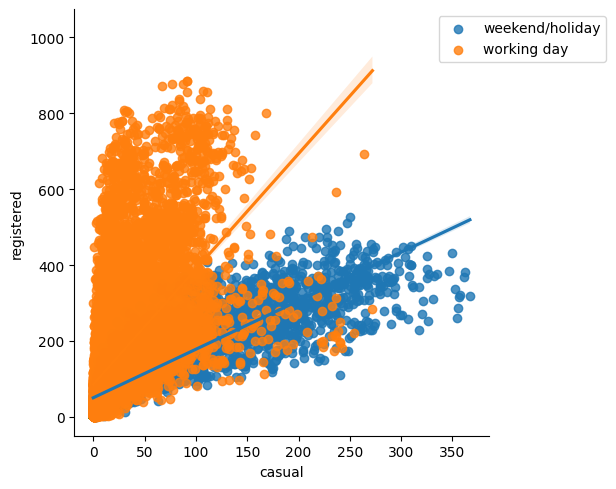

In [ ]:
# In your plot, you'll notice that your points are larger than ours. That's
# fine. If you'd like them to be smaller, you can add scatter_kws={'s': 6}
# to your lmplot call. That tells the underlying matplotlib scatter function
# to change the size of the points.

# your code here
bike_trips['day_class'] = bike_trips['weekday'].apply(lambda x: 'weekend/holiday' if x in [0, 6] else 'working day')

graph = sns.lmplot(x='casual', y='registered', data=bike_trips, hue='day_class', legend=False)

axis = graph.axes[0, 0]
axis.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title='')
plt.ylim(-50, 1075)

plt.show()

# Note that the legend for workingday isn't super helpful. 0 in this case
# means "not a working day" and 1 means "working day". Try fixing the legend
# to be more descriptive.
# HINT: ax = sns.lmplot(..., legend=True)
# legendObj = ax.legend # Modify this object

## Want to learn more?

Check out the `seaborn` tutorials on your own time. http://seaborn.pydata.org/tutorial.html

The `matplotlib` tutorial we linked in Question 1 is also a great refresher on common `matplotlib` functions: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

The differences between Python's visualization libraries:
https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/


# Part 2: Self-directed EDA of social media (45%)

This part is intentionally more open-ended and will be graded on the completeness of the plot(s) produced and the insights you gain from them.  The goal here is for you to thoroughly explore a dataset on attitudes towards the internet and whether it's good for society.

_Question 2.0_ is asking you to look at a given visualization and reverse engineer the code that created it. _Question 2.1_ is about _data exploration visualization_ while the other questions are about _data presentation visualization_. Report your two most significant findings (_Q2.2, Q2.3). Each finding should have a _visualization headline_  which highlights the main takeaway in 5-15 words, an informative visualization that supports your finding and a _visualization description_, 100-150 words per finding explaining your assumptions and what you have found. For each visualization in these two findings, create an alternate visualization (Q2.2.2, Q.2.3.2). For example, the visualization headline could be "_Majority of Facebook, Instagram and Snapchat users visit these social networks daily_" with the  bar plot visualization **q2-1.png**.



The file you will work with is `January 8-February 7, 2019 - Core Trends Survey.csv`. The file that contains information about the meaning of each feature is `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx`.


Be sure to consider transformations, subsets, correlations, reference markers, and lines/curves-of-best-fit (as covered in Chapter 6 of PTDS) to reveal the relationship that you are wanting to learn more about.  Also be sure to make plots that are appropriate for the variable types.  For completeness, be explicit about any assumptions you make in your analysis.  An exemplary plot will have:

* A title
* Labelled and appropriately scaled axes
* A legend, if applicable
* A carefully selected color scheme
* A main point, accentuated through design choices



## Q2.0 (5%): Reverse Engineer

Your first step is to load the data from `January 8-February 7, 2019 - Core Trends Survey.csv`, and understand what is stored in it. Read the  the survey questionnaire in `January 8-February 7, 2019 - Core Trends Survey - Questionnaire.docx` to understand the meaning of each feature. Your assignment is to replicate the bar plot visualization shown above. Notice the labels on x and y axes as well as the legend of the plot to determine the information needed to construct the plot.

/tmp/ipython-input-2202840803.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Frequency'] = final_data['Frequency'].replace({


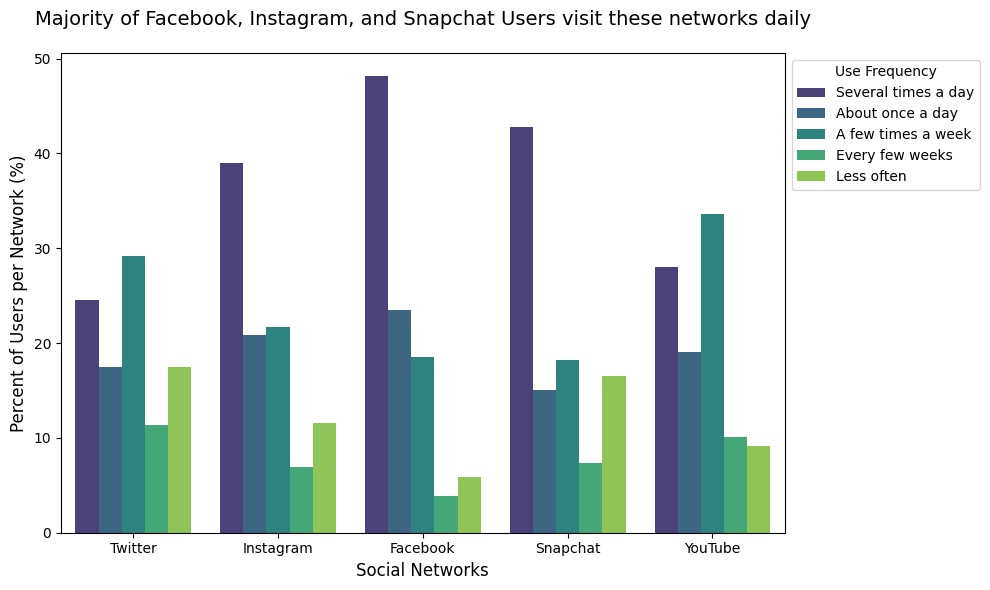

In [2]:
# [your code here]
#HINTS
# 1) Read your dataframe with pandas
# 2) Identify what colums are used for plot above
# 3) Filter required rows and columns necessary for plotting above figure
# 4) Your dataframe is in wide_format. You need to convert to long_format. See pandas.melt documentation
# i.e. originally there is a column each for these five social medias. The column name should be value for a new column.
# 5) Once dataframe is in wide format, filter individuals who responded to the survey
# 6) Use pandas aggregation after groupby to calculate percentage of responses for each social media
# 7) Use seaborn barplot to plot the figure above. Customize with color palette='viridis'
# 8) Add descriptive xlabel, ylabel, and title
# 9) Customize legend if necessary

import pandas as pd

data = pd.read_csv('January 8-February 7, 2019 - Core Trends Survey.csv')

selected_cols = data[['web1a', 'web1b', 'web1c', 'web1d', 'web1e', 'sns2a', 'sns2b', 'sns2c', 'sns2d', 'sns2e']]

users = selected_cols[
    (selected_cols['web1a'] == 1) | (selected_cols['web1b'] == 1) | (selected_cols['web1c'] == 1) | (selected_cols['web1d'] == 1) | (selected_cols['web1e'] == 1)
].reset_index(drop=True)
users = users.loc[:, 'web1a':'sns2e']

users.columns = [
    'Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube',
    'Twitter_freq', 'Instagram_freq', 'Facebook_freq', 'Snapchat_freq', 'YouTube_freq'
]

platforms = ['Twitter', 'Instagram', 'Facebook', 'Snapchat', 'YouTube']
freq_columns = [f"{platform}_freq" for platform in platforms]

frequency_data = []
for i, platform in enumerate(platforms):
    freq = users.groupby([platform, freq_columns[i]]).size().reset_index(name='Count')
    freq = freq[freq[platform] == 1].iloc[:5]
    freq.rename(columns={platform: 'Platform', freq_columns[i]: 'Frequency'}, inplace=True)
    freq['Platform'] = platform
    frequency_data.append(freq)

combined_freq = pd.concat(frequency_data)

total_counts = combined_freq.groupby('Platform')['Count'].sum().reset_index(name='Total_Count')

merged_data = pd.merge(combined_freq, total_counts, on='Platform')
merged_data['Percent'] = (merged_data['Count'] / merged_data['Total_Count']) * 100

final_data = merged_data[['Platform', 'Frequency', 'Percent']]
final_data['Frequency'] = final_data['Frequency'].replace({
    '1': 'Several times a day',
    '2': 'About once a day',
    '3': 'A few times a week',
    '4': 'Every few weeks',
    '5': 'Less often'
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Percent', hue='Frequency', data=final_data, palette='viridis')
plt.title("Majority of Facebook, Instagram, and Snapchat Users visit these networks daily", fontsize=14, pad=20)
plt.xlabel("Social Networks", fontsize=12)
plt.ylabel("Percent of Users per Network (%)", fontsize=12)
plt.legend(title="Use Frequency", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()




## Q2.1 (10%): Initial exploration

Run descriptive statistics on the data by considering the EDA key data properties we covered in class. Write a 100-150 word description of your findings. Based on these statistics or other ideas you have, form hypotheses that guide your EDA and visualizations for the last three questions. You need to show at least one visualization but you are welcome to show more.

In [3]:
# Run descriptive statistics on the data and develop ideas on what to explore
# your code here

import pandas as pd
import numpy as np

s = data[['age','eminuse','intmob','snsint2']].copy()
s['age'] = pd.to_numeric(s['age'], errors='coerce')
ad = s[s['age'] < 60]
sr = s[s['age'] >= 60]

ad_inet = ((ad['eminuse'].isin([1,2])) & (ad['eminuse']==1)).mean()*100
ad_mob  = ((ad['intmob'].isin([1,2]))  & (ad['intmob']==1)).mean()*100
ad_soc  = ((ad['snsint2'].isin([1,2])) & (ad['snsint2']==1)).mean()*100

sr_inet = ((sr['eminuse'].isin([1,2])) & (sr['eminuse']==1)).mean()*100
sr_mob  = ((sr['intmob'].isin([1,2]))  & (sr['intmob']==1)).mean()*100
sr_soc  = ((sr['snsint2'].isin([1,2])) & (sr['snsint2']==1)).mean()*100

print("\n" + "="*72)
print("TRENDS IN INTERNET CONNECTIVITY AND SOCIAL MEDIA USE")
print("="*72 + "\n")

print("Adults (age < 60)")
print(f"  Internet/email users : {ad_inet:.2f}%")
print(f"  Mobile internet users: {ad_mob:.2f}%")
print(f"  Social media users   : {ad_soc:.2f}%\n")

print("Seniors (age ≥ 60)")
print(f"  Internet/email users : {sr_inet:.2f}%")
print(f"  Mobile internet users: {sr_mob:.2f}%")
print(f"  Social media users   : {sr_soc:.2f}%")

plat = ['web1a','web1b','web1c','web1d','web1e']
freq = ['sns2a','sns2b','sns2c','sns2d','sns2e']

u = data[plat].copy()
for c in plat:
    u[c] = np.where(u[c]==1,1,np.where(u[c]==2,0,np.nan))

data['platform_count'] = u.sum(axis=1, skipna=True)
f = data[freq].apply(pd.to_numeric, errors='coerce')

daily = (
    ((u['web1a']==1) & f['sns2a'].isin([1,2])) |
    ((u['web1b']==1) & f['sns2b'].isin([1,2])) |
    ((u['web1c']==1) & f['sns2c'].isin([1,2])) |
    ((u['web1d']==1) & f['sns2d'].isin([1,2])) |
    ((u['web1e']==1) & f['sns2e'].isin([1,2]))
).astype(float)
data['daily_any_platform'] = daily

print("\n" + "="*72)
print("GENDER AND SOCIAL MEDIA ENGAGEMENT")
print("="*72 + "\n")

for code, lab in [(1,"Men"), (2,"Women")]:
    g = data[data['sex']==code]
    pct_d = (g['daily_any_platform']==1.0).mean()*100
    tw = (g['web1a']==1).mean()*100
    ig = (g['web1b']==1).mean()*100
    fb = (g['web1c']==1).mean()*100
    sc = (g['web1d']==1).mean()*100
    yt = (g['web1e']==1).mean()*100

    print(lab)
    print(f"  Daily user (any plat) : {pct_d:.2f}%")
    print(f"  Twitter users         : {tw:.2f}%")
    print(f"  Instagram users       : {ig:.2f}%")
    print(f"  Facebook users        : {fb:.2f}%")
    print(f"  Snapchat users        : {sc:.2f}%")
    print(f"  YouTube users         : {yt:.2f}%\n")

groups = {
    'Low income (<$30k)': [1,2,3],
    'Middle income ($30k–$75k)': [4,5,6],
    'Upper-middle income ($75k–$150k)': [7,8],
    'High income (>$150k)': [9]
}

PHONE_COL = 'device1a'
ph = pd.to_numeric(data[PHONE_COL], errors='coerce')
data['_smart'] = np.where(ph==1,1,np.where(ph==2,0,np.nan)).astype(float)

print("\n" + "="*72)
print("INCOME AND INTERNET ACCESS")
print("="*72 + "\n")

print("Home Internet Subscription (%)\n")
for lab, codes in groups.items():
    g = data[data['inc'].isin(codes)]
    val_ok = g['home4nw'].isin([1,2])
    pct = (g.loc[val_ok,'home4nw']==1).mean()*100 if val_ok.any() else np.nan
    print(f"{lab}: Home Internet {pct:.2f}%")

print("\nSmartphone Ownership (%)\n")
for lab, codes in groups.items():
    g = data[data['inc'].isin(codes)]
    ok = g['_smart'].notna()
    pct = g.loc[ok,'_smart'].mean()*100 if ok.any() else np.nan
    print(f"{lab}: Smartphone {pct:.2f}%")



TRENDS IN INTERNET CONNECTIVITY AND SOCIAL MEDIA USE

Adults (age < 60)
  Internet/email users : 94.73%
  Mobile internet users: 94.19%
  Social media users   : 80.19%

Seniors (age ≥ 60)
  Internet/email users : 79.23%
  Mobile internet users: 71.38%
  Social media users   : 50.44%

GENDER AND SOCIAL MEDIA ENGAGEMENT

Men
  Daily user (any plat) : 63.53%
  Twitter users         : 24.03%
  Instagram users       : 28.99%
  Facebook users        : 61.59%
  Snapchat users        : 19.93%
  YouTube users         : 76.57%

Women
  Daily user (any plat) : 64.39%
  Twitter users         : 18.99%
  Instagram users       : 37.54%
  Facebook users        : 73.44%
  Snapchat users        : 17.80%
  YouTube users         : 64.84%


INCOME AND INTERNET ACCESS

Home Internet Subscription (%)

Low income (<$30k): Home Internet 60.23%
Middle income ($30k–$75k): Home Internet 83.75%
Upper-middle income ($75k–$150k): Home Internet 92.99%
High income (>$150k): Home Internet 96.70%

Smartphone Ownership 

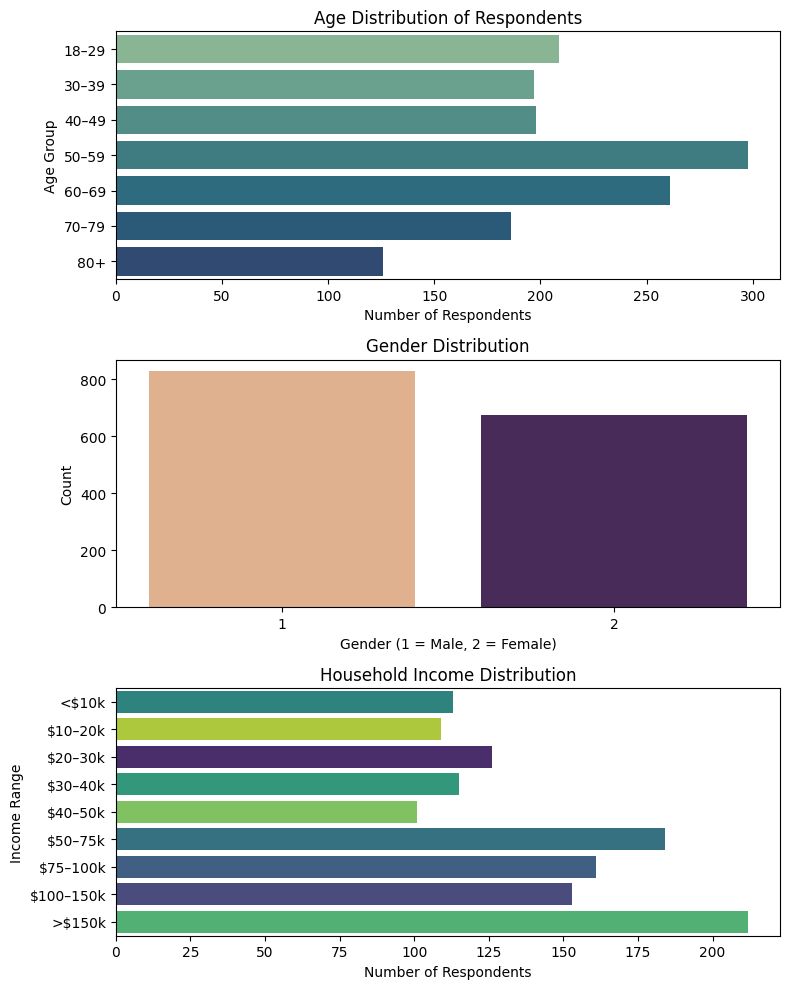

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))

# --- AGE DISTRIBUTION ---
plt.subplot(3,1,1)
age_bins   = [18, 29, 39, 49, 59, 69, 79, 100]
age_labels = ['18–29','30–39','40–49','50–59','60–69','70–79','80+']
data['age_group'] = pd.cut(pd.to_numeric(data['age'], errors='coerce'),
                           bins=age_bins, labels=age_labels)
sns.countplot(y='age_group', hue='age_group', data=data,
              order=age_labels, palette='crest', legend=False)
plt.title('Age Distribution of Respondents', fontsize=12)
plt.xlabel('Number of Respondents'); plt.ylabel('Age Group')

# --- GENDER DISTRIBUTION ---
plt.subplot(3,1,2)
sns.countplot(x='sex', hue='sex', data=data, palette='flare', legend=False)
plt.title('Gender Distribution', fontsize=12)
plt.xlabel('Gender (1 = Male, 2 = Female)'); plt.ylabel('Count')

# --- INCOME DISTRIBUTION ---
plt.subplot(3,1,3)
income_labels = {
    1:'<$10k', 2:'$10–20k', 3:'$20–30k', 4:'$30–40k',
    5:'$40–50k', 6:'$50–75k', 7:'$75–100k', 8:'$100–150k', 9:'>$150k'
}
data['income_label'] = data['inc'].map(income_labels)
order_income = list(income_labels.values())
sns.countplot(y='income_label', hue='income_label', data=data,
              order=order_income, palette='viridis', legend=False)
plt.title('Household Income Distribution', fontsize=12)
plt.xlabel('Number of Respondents'); plt.ylabel('Income Range')

plt.tight_layout()
plt.show()


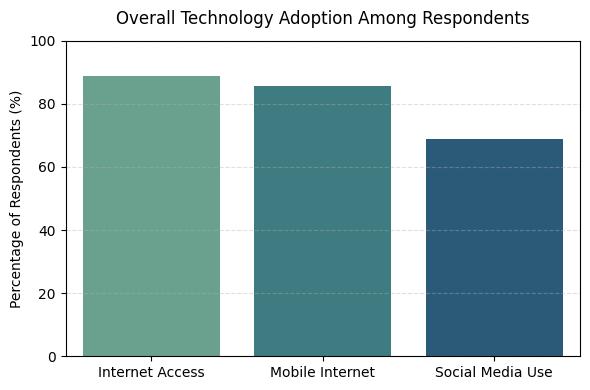

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Technology Adoption Overview (Internet, Mobile, Social) ---
tech_df = pd.DataFrame({
    'Technology': ['Internet Access','Mobile Internet','Social Media Use'],
    'Percentage': [
        (data['eminuse'] == 1).mean() * 100,
        (data['intmob']  == 1).mean() * 100,
        (data['snsint2'] == 1).mean() * 100
    ]
})

plt.figure(figsize=(6,4))
sns.barplot(x='Technology', y='Percentage', hue='Technology', data=tech_df, palette='crest', legend=False)
plt.title('Overall Technology Adoption Among Respondents', pad=12)
plt.ylim(0, 100)
plt.ylabel('Percentage of Respondents (%)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Enter your 100-150 word description here.

I explored the main characteristics of the dataset to understand the overall trends and differences among respondents. I began by examining internet and social media usage across age groups, gender, and income levels. The results showed that younger adults have higher internet and mobile usage rates, while seniors use these services less often. Women tend to use more social media platforms on average and show slightly higher daily engagement. Income also plays a clear role, with higher-income groups having better access to home internet and smartphones. To visualize this, I plotted demographic distributions (age, gender, income) and an overview of technology adoption. These helped highlight that most respondents are middle-aged, balanced by gender, and have widespread internet access—forming a good base for deeper analysis in the next section.


## Q2.2 (10%+5%):
### Q2.2.1 Younger Adults Exhibit the Highest Daily Social Media Engagement

The chart shows that daily social media usage steadily decreases with age, with the youngest groups being the most active online.

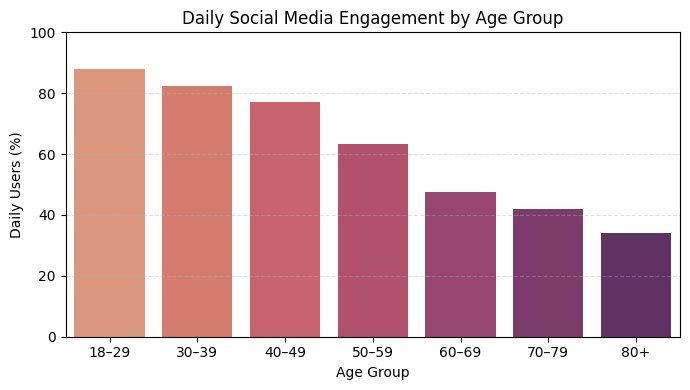

In [6]:
# your Q2.2.1 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf
# your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

need_use = ['web1a','web1b','web1c','web1d','web1e']
need_freq = ['sns2a','sns2b','sns2c','sns2d','sns2e']
for c in need_use + need_freq + ['age']:
    if c not in data.columns:
        raise KeyError(f"Missing column: {c}")

bins = [18, 29, 39, 49, 59, 69, 79, 120]
labels = ['18–29','30–39','40–49','50–59','60–69','70–79','80+']
age_num = pd.to_numeric(data['age'], errors='coerce')
age_grp = pd.cut(age_num, bins=bins, labels=labels)
data = data.copy()
data['age_group'] = age_grp

daily = pd.Series(False, index=data.index)
for u, f in zip(need_use, need_freq):
    fnum = pd.to_numeric(data[f], errors='coerce')
    daily = daily | ((data[u] == 1) & (fnum.isin([1, 2])))

summary = (
    pd.DataFrame({'age_group': data['age_group'], 'daily_user': daily})
      .groupby('age_group', observed=True)['daily_user']
      .mean()
      .mul(100)
      .reset_index()
)

plt.figure(figsize=(7,4))
sns.barplot(x='age_group', y='daily_user', hue='age_group', data=summary, palette='flare', legend=False)
plt.title('Daily Social Media Engagement by Age Group')
plt.xlabel('Age Group'); plt.ylabel('Daily Users (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()


### Q2.2.2 Alternate visualization

Now use your results and visualization from Q2.2.1 and find an alternate way to visualize it. You are encouraged to look at publicly available examples to guide you and can use any visualization package of your choice. Be creative!

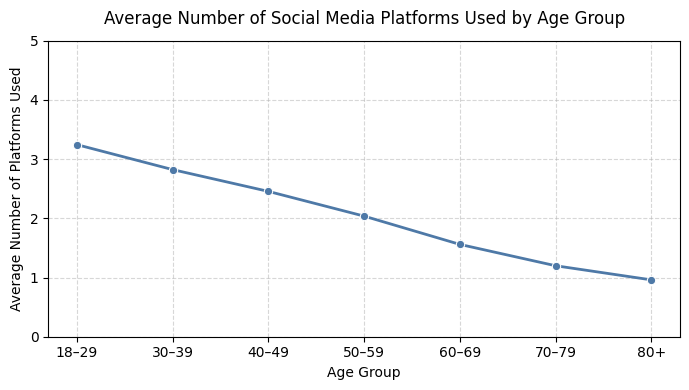

In [7]:
# your Q2.2.2 visualization code should be included here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plat_cols = ['web1a','web1b','web1c','web1d','web1e']
data['platform_count'] = (data[plat_cols] == 1).sum(axis=1, min_count=1)

bins = [18, 29, 39, 49, 59, 69, 79, 120]
labels = ['18–29','30–39','40–49','50–59','60–69','70–79','80+']
data['age_group'] = pd.cut(pd.to_numeric(data['age'], errors='coerce'),
                           bins=bins, labels=labels)

avg_platforms = (
    data.groupby('age_group', observed=True)['platform_count']
    .mean().reset_index()
)

plt.figure(figsize=(7,4))
sns.lineplot(x='age_group', y='platform_count', data=avg_platforms,
             marker='o', color='#4E79A7', linewidth=2)
plt.title('Average Number of Social Media Platforms Used by Age Group', pad=12)
plt.xlabel('Age Group')
plt.ylabel('Average Number of Platforms Used')
plt.ylim(0, 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




## Q2.3 (10%+5%):
### Q2.3.1 Women Report Higher Usage Across Most Major Social Media Platforms

The visualization shows that women consistently use social media platforms more than men.

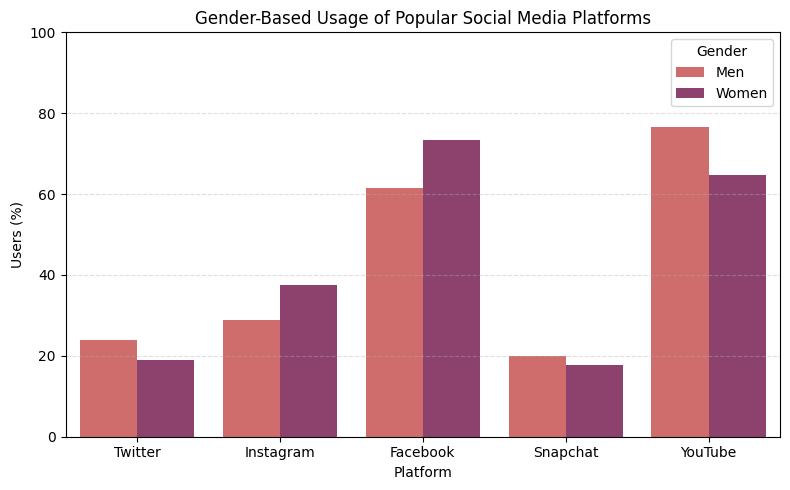

In [8]:
# your Q2.3.1 visualization code should be included here
# make sure to execute it, so we can see your plot in the submitted pdf
# your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if 'sex' not in data.columns:
    raise KeyError("Missing column: sex")

platform_map = {
    'web1a': 'Twitter',
    'web1b': 'Instagram',
    'web1c': 'Facebook',
    'web1d': 'Snapchat',
    'web1e': 'YouTube'
}
for c in platform_map:
    if c not in data.columns:
        raise KeyError(f"Missing column: {c}")

rows = []
for col, name in platform_map.items():
    for g_code, g_lab in [(1, 'Men'), (2, 'Women')]:
        gsub = data.loc[data['sex'] == g_code]
        pct = (gsub[col] == 1).mean() * 100
        rows.append({'Gender': g_lab, 'Platform': name, 'Usage': pct})

gender_df = pd.DataFrame(rows)

plt.figure(figsize=(8,5))
sns.barplot(x='Platform', y='Usage', hue='Gender', data=gender_df, palette='flare')
plt.title('Gender-Based Usage of Popular Social Media Platforms')
plt.xlabel('Platform'); plt.ylabel('Users (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout(); plt.show()


### Q2.3.2 Alternate visualization

Now use your results and visualization from Q2.3.1 and find an alternate way to visualize it. You are encouraged to look at publicly available examples to guide you and can use any visualization package of your choice. Be creative!

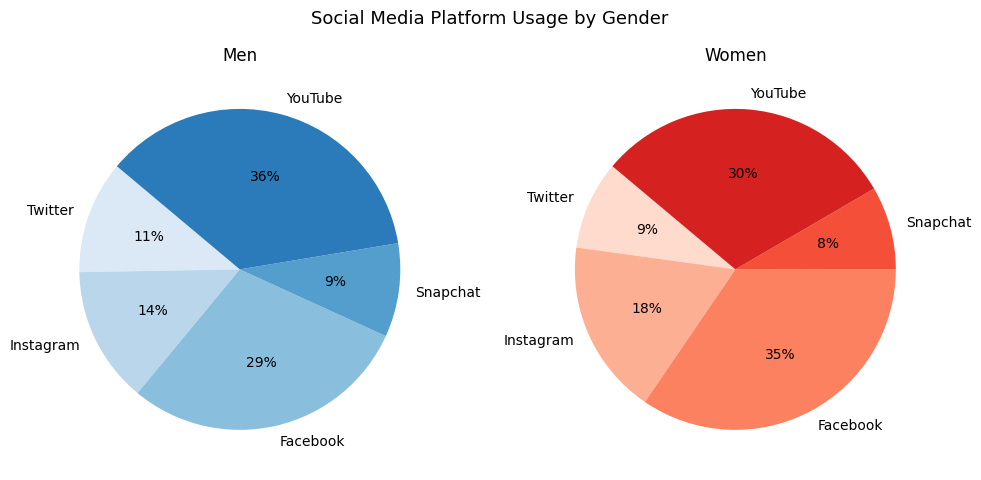

In [9]:
# your Q2.3.2 visualization code should be included here

import matplotlib.pyplot as plt

men = gender_df[gender_df['Gender'] == 'Men']
women = gender_df[gender_df['Gender'] == 'Women']

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].pie(men['Usage'], labels=men['Platform'],
            autopct='%1.0f%%', startangle=140, colors=sns.color_palette('Blues'))
axes[0].set_title('Men')

axes[1].pie(women['Usage'], labels=women['Platform'],
            autopct='%1.0f%%', startangle=140, colors=sns.color_palette('Reds'))
axes[1].set_title('Women')

plt.suptitle('Social Media Platform Usage by Gender', fontsize=13, y=0.98)
plt.tight_layout(); plt.show()


# Part 3: Error and loss functions (10%)

The last part is about implementing and explore some concepts that we have seen in the class.

## Implement the MSE and MAE
a) Implement MSE (mean Sqaured Error) by your own. Compare with the built-in function (from sklearn.metrics import mean_squared_error) by generating a random sequence of 10 numbers.
b) Implement MAE (mean absolute error) by your own. Compare with the built-in function (from sklearn.metrics import mean_absolute_error) by generating a random sequence of 10 numbers.


In [ ]:
# your code here - MSE
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(42)
actual_values = np.random.rand(10)
predicted_values = np.random.rand(10)

print("Actual values:", actual_values)
print("Predicted values:", predicted_values)

def mse_func(true, pred):
    n = true.size
    mse = np.sum((true - pred) ** 2) / n
    return mse

mse = mse_func(actual_values, predicted_values)
sklearn_mse = mean_squared_error(actual_values, predicted_values)

print("\nMSE (mine):", mse)
print("MSE (Sklearn):", sklearn_mse)

Actual values: [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]
Predicted values: [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497 0.18340451
 0.30424224 0.52475643 0.43194502 0.29122914]

MSE (mine): 0.066594135739203
MSE (Sklearn): 0.066594135739203


In [ ]:
# your code here - MAE
def mae_func(true, pred):
    n = true.size
    mae = np.sum(np.abs(true - pred)) / n
    return mae

mae = mae_func(actual_values, predicted_values)
sklearn_mae = mean_absolute_error(actual_values, predicted_values)

print("MAE (mine):", mae)
print("MAE (Sklearn):", sklearn_mae)

MAE (mine): 0.20867273347264428
MAE (Sklearn): 0.20867273347264428


# Extra Credit (10%)
Explain what the Huber loss is and how it differs from traditional loss functions like Mean Squared Error (MSE). What role does the parameter
 δ play in the Huber loss function? Provide an example scenario where using Huber loss might be beneficial compared to using MSE.

Huber loss is a loss function that is less affected by outliers compared to Mean Squared Error (MSE).
It behaves like MSE for small errors (quadratic) and like Mean Absolute Error (MAE) for large errors (linear), which makes it more stable when some data points are very far from the rest.


The parameter δ (delta) decides where this change happens:

When the absolute error is less than δ, Huber loss acts like MSE (quadratic).

When the error is greater than δ, it switches to a linear form like MAE.


Consider predicting how long people sleep each night based on their daily habits. Most people sleep around 6–8 hours, but a few nights might have very short or very long sleep due to special events or stress. Using MSE, these unusual nights would heavily affect the model, while Huber loss reduces their impact, leading to a more balanced prediction for typical sleep patterns.

This was the last part of Homework 2. Now you need to submit your work following the instructions in the beginning of the notebook and you are done!